DS-03 DATA SCIENCE UND KI - BEISPIEL KUNDENABWANDERUNG IN EINEM TELEKOMMUNIKATIONSUNTERNEHMEN:
"Ein Mobilfunkanbieter möchte wissen, weshalb Kunden abwandern. Dazu wurde ein Data-Science-Projekt im Unternehmen initiiert."

Im ersten Schritt hatten wir uns dazu die einzelnen Phasen im CRIP_DM Modell angeschaut
und die erste Phase des Business Understanding gemeinsam abgeschlossen.
Nun wollen wir uns an die konkrete Umsetzung machen."

DATA UNDERSTANDING - welche Daten stehen uns zur Verfügung? Welche Qualität haben die Daten?

-> Wir haben Daten zu rd. 7.000 Kunden.

Bevor wir uns die Daten in Jupyter genauer anschauen können, müssen wir erst die notwendigen Bibliotheken laden:

In [11]:
# requirement for allowing visualizations (e.g. pie charts, bar charts, etc.):
flagShowFigures = True

In [12]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

Jetzt können wir die Daten laden (vorausgesetzt, die Datei WA_Fn-UseC_-Telco-Customer-Churn.csv befindet sich im aktuellen Verzeichnis):

In [13]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn - modifiziert.csv')

Zunächst ein schneller Überblick über die ersten Zeilen:

In [14]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In der letzten Spalte sehen wir, ob der Kunde im letzten Monat gekündigt hat.

Wie groß ist der Datensatz?

In [15]:
df.shape

(7043, 21)

Welche Datentypen werden verwendet?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---
Prüfen wir die Qualität der Daten:

Zunächst zeigen wir uns fehlende Werte an:

<AxesSubplot:>

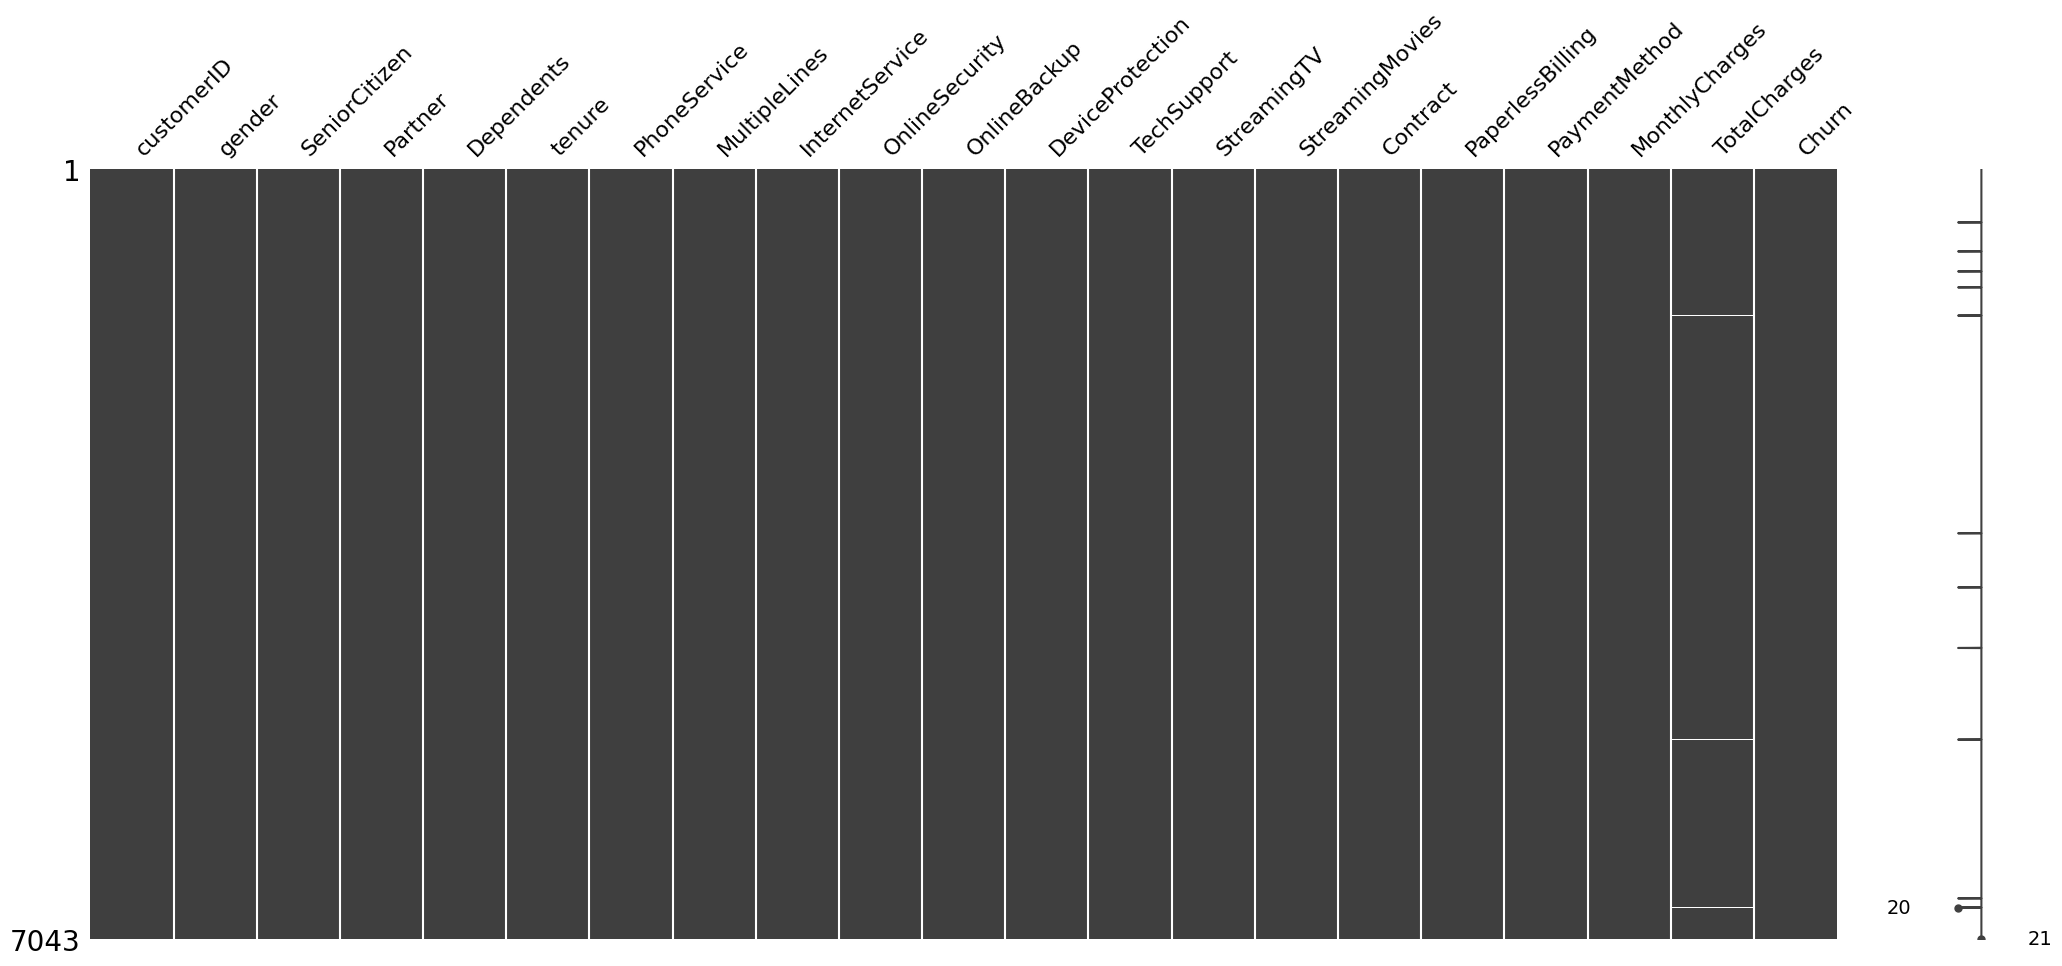

In [17]:
msno.matrix(df)

Ergebnis: Es gibt ein paar wenige fehlende Daten

**Achtung: Damit finden wir nur wirklich fehlende Einträge**. Was passiert aber, wenn ein Blank " " statt einem Wert eingegeben wurde? Oder bei der Eingabe ein Zahlenwert erwartet wurde und der Kunde Text oder ein Zeichen eingegen hat?

Diese können wir zusätzlich herausfinden, wenn wir die Spalten, in denen wir numerische Werte erwarten, zwangsweise in numerische Werte konvertieren:

In [18]:
# errors einer num-transformation werden aufsummiert:
df['SeniorCitizen'] = pd.to_numeric(df.SeniorCitizen, errors='coerce')
df['tenure'] = pd.to_numeric(df.tenure, errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df.MonthlyCharges, errors='coerce')
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        2
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Schauen wir uns die numerischen Spalten noch etwas genauer an: 

In [19]:
numerical_cols = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7041.000000,7043.000000,7043.000000,7032.000000
mean,0.162193,32.371149,64.761692,2283.300441
std,0.368654,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Fällt Ihnen an der Statistik etwas auf?

---
<b>Tauchen wir tiefer in die Daten ein und visualisieren sie!</b>

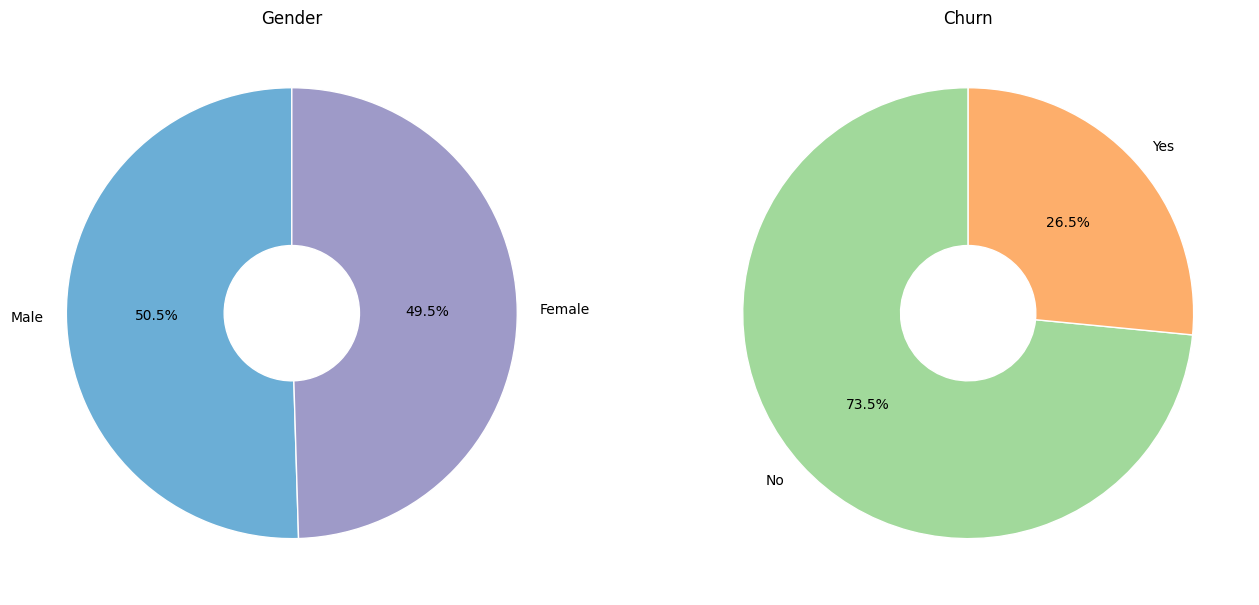

In [20]:

#Parameter für die Grafik
plt.rcParams["figure.figsize"] = (16,16)
cmap = plt.colormaps["tab20c"]
colors1 = cmap([1,13])
colors2 = cmap([10,6])
innersize = 0.7

#Legende
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

#Pie-Chart
if flagShowFigures:
    fig, axs = plt.subplots(1, 2)
    axs[0].pie(df['gender'].value_counts(), autopct='%.1f%%', labels = g_labels, startangle=90, wedgeprops=dict(width=innersize, edgecolor='w'), colors=colors1)
    axs[0].set_title('Gender')

    axs[1].pie(df['Churn'].value_counts(), autopct='%.1f%%', labels = c_labels, startangle=90,wedgeprops=dict(width=innersize, edgecolor='w'), colors=colors2)
    axs[1].set_title('Churn')

    plt.show()

In [21]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

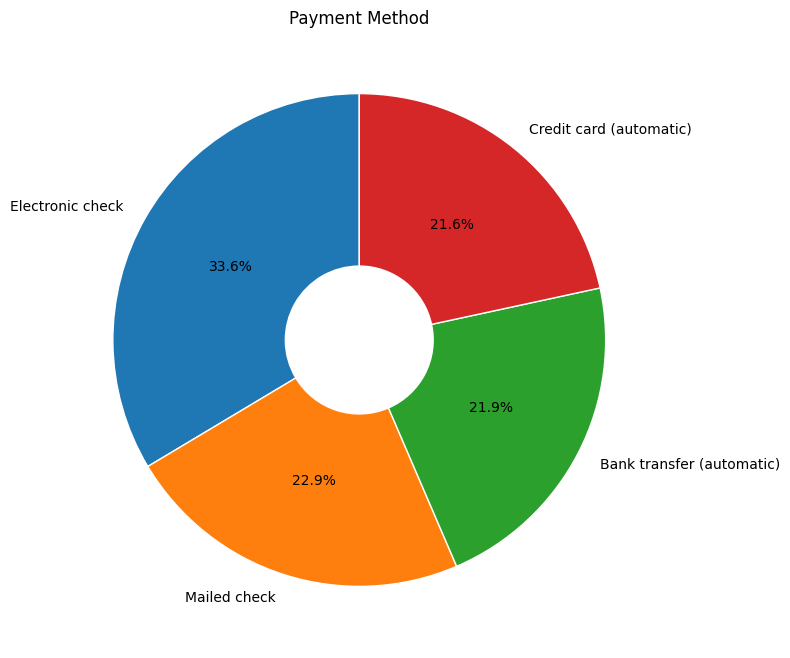

In [22]:
#Legende
labels = df['PaymentMethod'].unique()

#Pie-Chart
if flagShowFigures:
    plt.rcParams["figure.figsize"] = (8,8)
    fig, ax = plt.subplots()
    ax.pie(df.PaymentMethod.value_counts(), autopct='%.1f%%', labels = labels, startangle=90, wedgeprops=dict(width=innersize, edgecolor='w'))
    ax.set_title('Payment Method')

    plt.show()

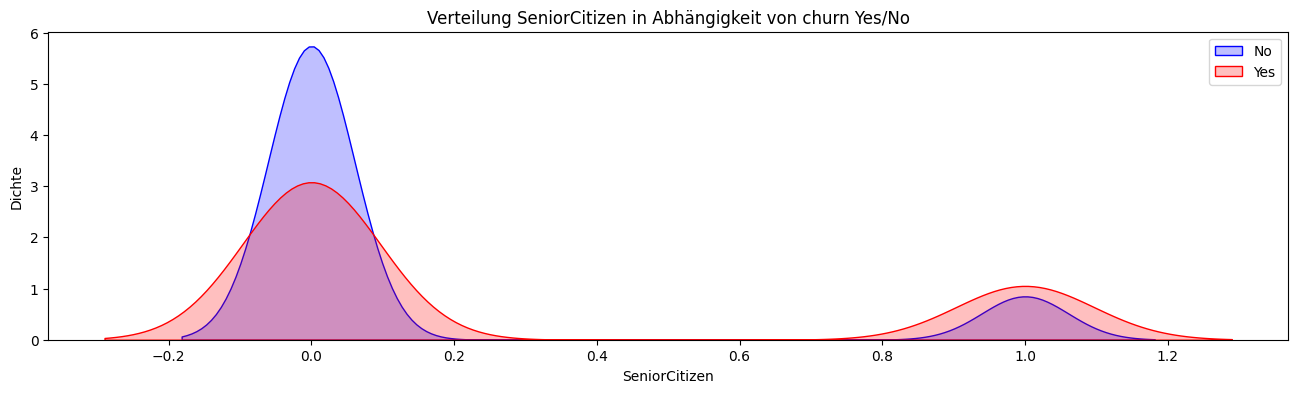

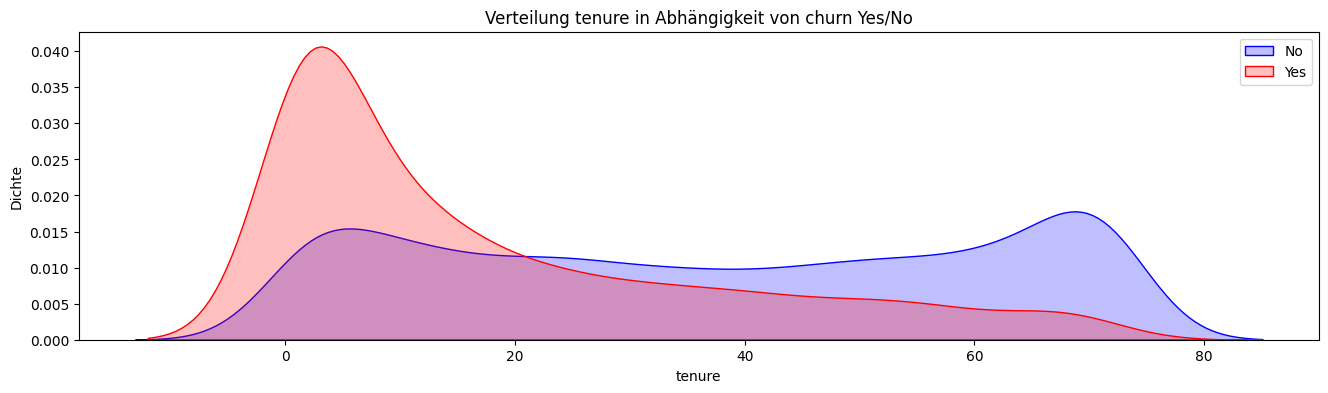

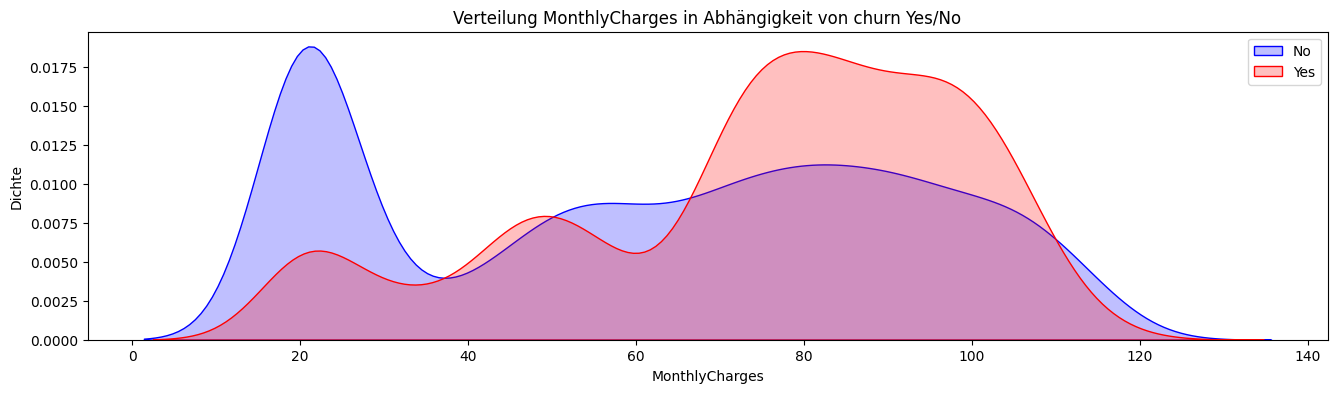

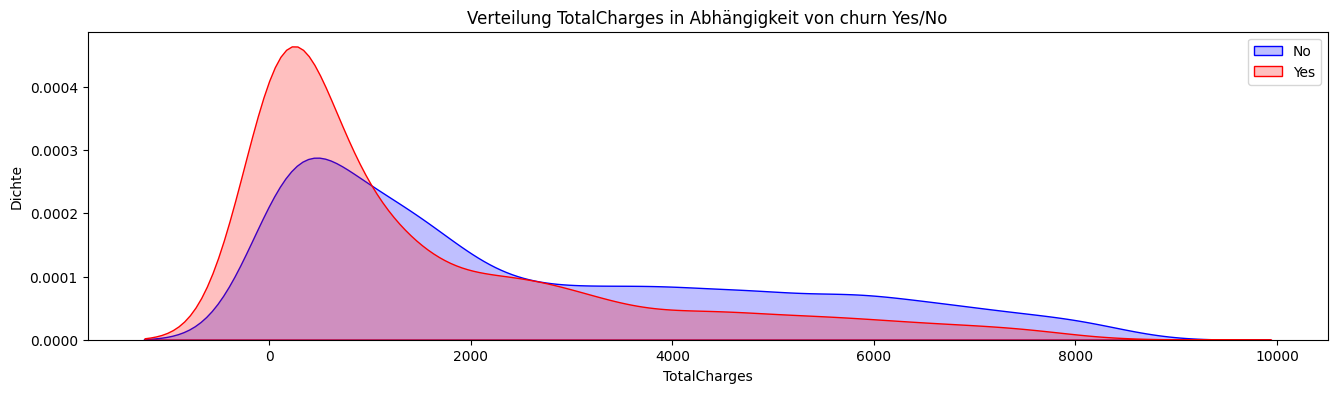

In [23]:
#Verteilung der Kunden nach Churn in den numerischen Spalten
if flagShowFigures:
    for feature in numerical_cols:
        plt.rcParams["figure.figsize"] = (16,4)
        fig, ax = plt.subplots()

        ax = sns.kdeplot(df[feature][(df["Churn"] == 'No')],
                        color="Blue", shade = True)
        ax = sns.kdeplot(df[feature][(df["Churn"] == 'Yes')],
                        ax =ax, color="Red", shade= True)

        ax.legend(["No","Yes"],loc='upper right')
        ax.set_ylabel('Dichte')
        ax.set_xlabel(feature)
        ax.set_title('Verteilung %s in Abhängigkeit von churn Yes/No' % feature)
        plt.show()

['Female' 'Male']


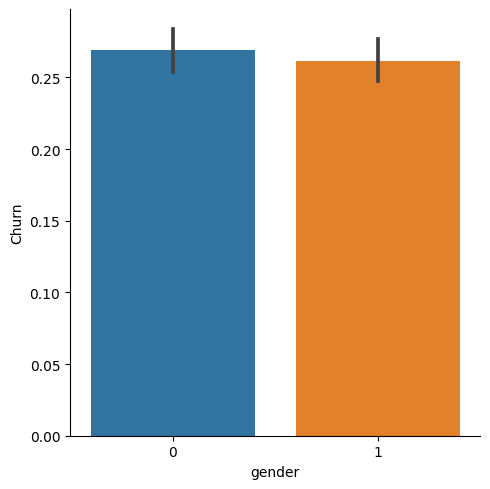

['Yes' 'No']


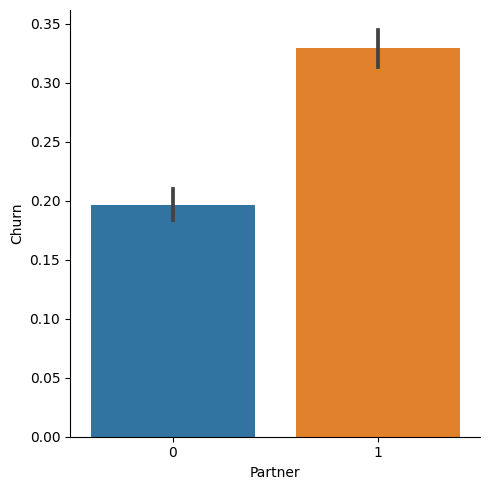

['No' 'Yes']


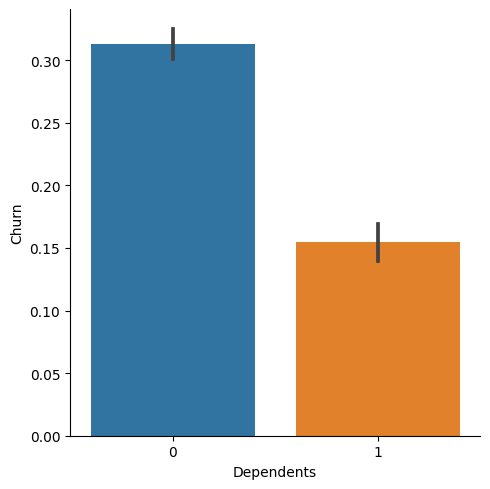

['No' 'Yes']


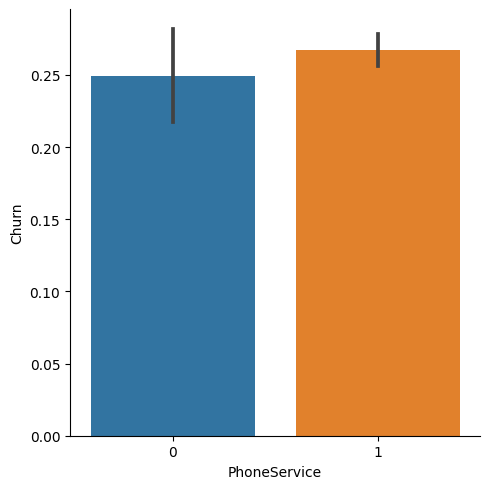

['No phone service' 'No' 'Yes']


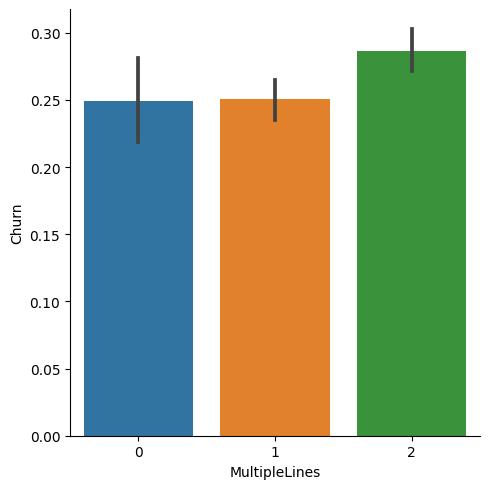

['DSL' 'Fiber optic' 'No']


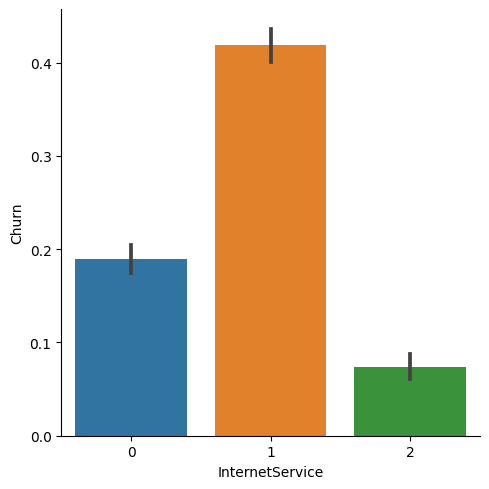

['No' 'Yes' 'No internet service']


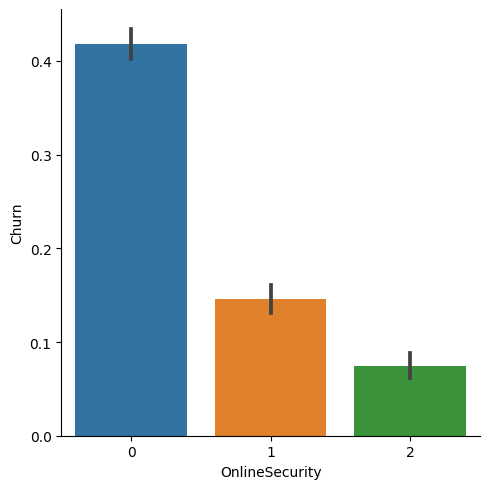

['Yes' 'No' 'No internet service']


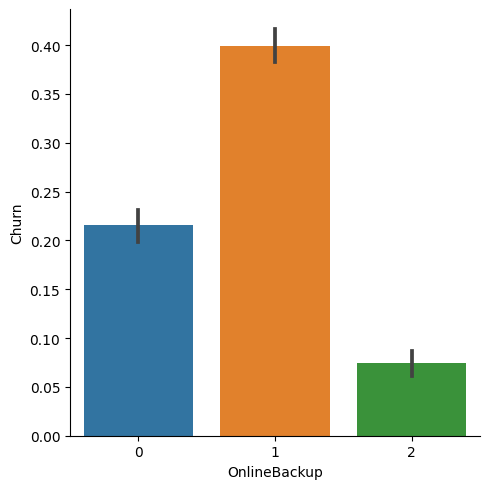

['No' 'Yes' 'No internet service']


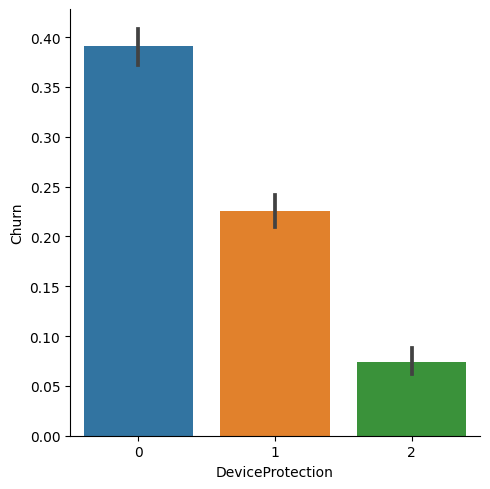

['No' 'Yes' 'No internet service']


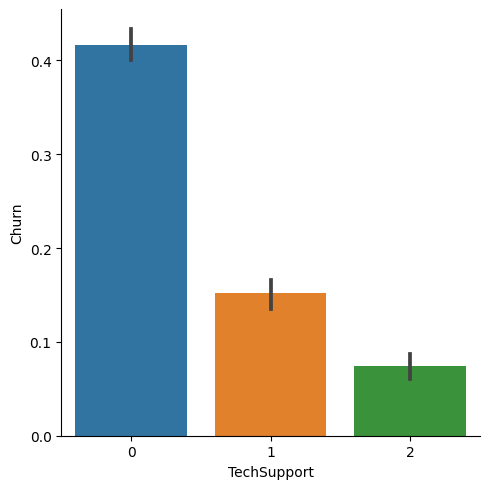

['No' 'Yes' 'No internet service']


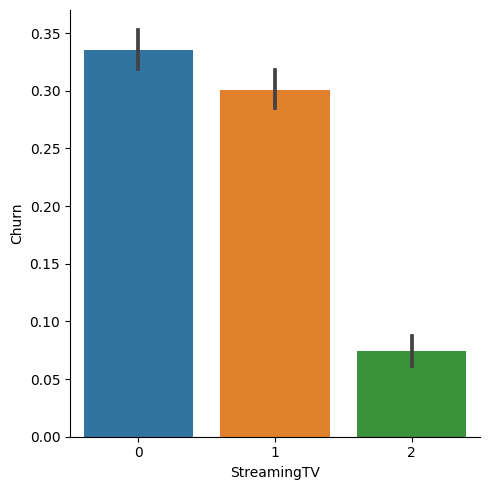

['No' 'Yes' 'No internet service']


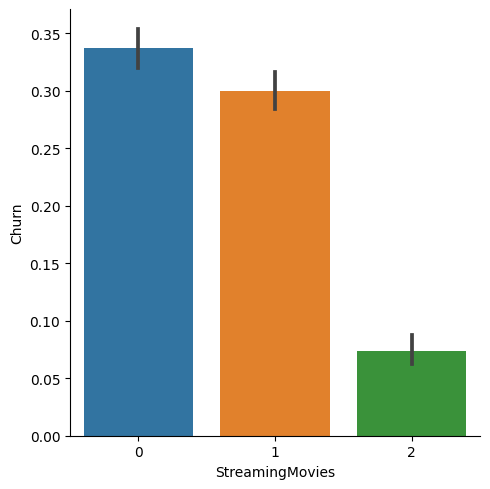

['Month-to-month' 'One year' 'Two year']


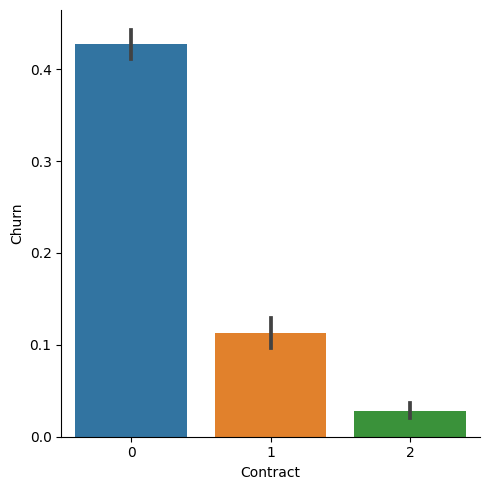

['Yes' 'No']


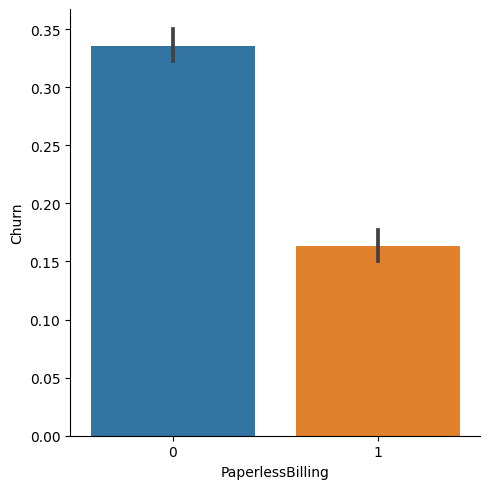

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


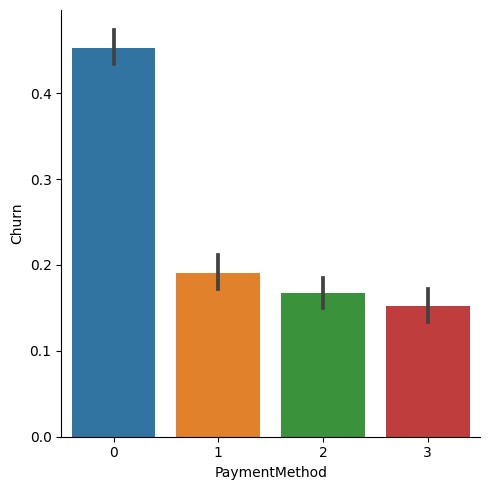

In [26]:
#Verteilung der Kunden nach Churn in den übrigen Spalten
dff = df.apply(lambda x: pd.factorize(x)[0])
if flagShowFigures:
    
    for feature in df.columns:
        if not feature in numerical_cols and not feature in ["customerID","Churn"]:
            labels = df[feature].unique()
            print(labels)
            plt.rcParams["figure.figsize"] = (8,4)
            #fig, ax = plt.subplots()
            ax = sns.catplot(ax=ax, x=feature, y="Churn", kind="bar", data=dff)
            plt.show()    

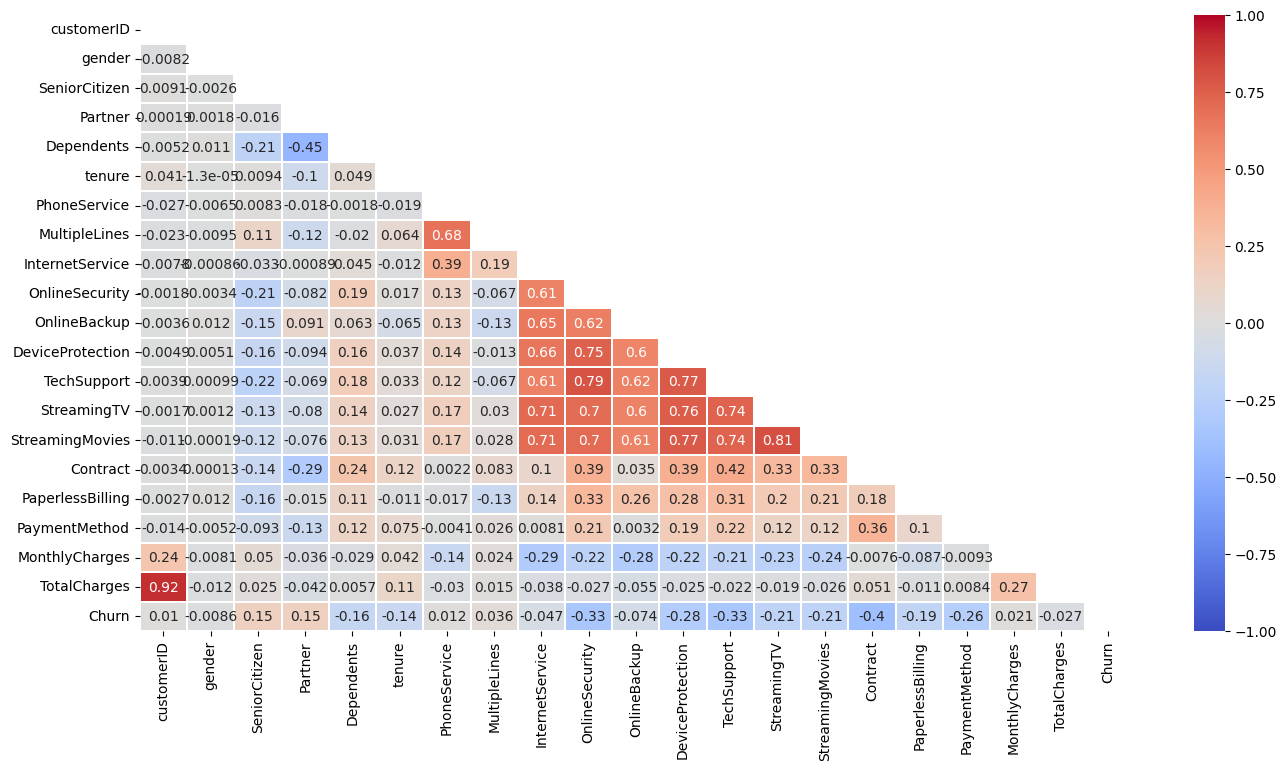

In [28]:
#Korrelation der Fetures
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
if flagShowFigures:
    plt.rcParams["figure.figsize"] = (16,8)
    fig, ax = plt.subplots()
    ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
